# Machine Learning with SciKit-Learn

## SciKits
Packages that use SciPy/NumPy, but are not included in the default installation because they are not "general" enough

In [1]:
from IPython.display import HTML
HTML('<iframe src="http://scikit-learn.org/stable/" width=800 height=500></iframe>')

## An example: Handwriting recognition!

We will:
* load some data that contains a list of images of handwritten digits and the correct digit as a label.
* split the data in two sets: **training** and **testing**
* train a classifier on the training set
* use that classifier to predict the value of the images in the testing set!



In [2]:
from sklearn import datasets, svm, metrics
from matplotlib import pyplot as plt
%matplotlib inline

There are 1797 images in the dataset


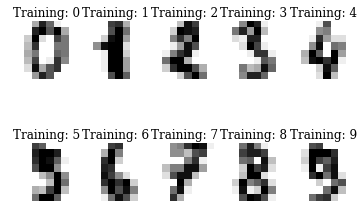

In [3]:
digits = datasets.load_digits()

n_samples = len(digits.images)

# what is in the data?
images_and_labels = list(zip(digits.images, digits.target))
print "There are {} images in the dataset".format(n_samples)

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


To apply a classifier on this data, we need to flatten the image, to
turn the data in a (samples, feature) matrix:

In [4]:
print digits.images[0].shape
labels = digits.target
data = digits.images.reshape((n_samples, -1)) # flattens each image

print n_samples
print "DATA\n",data[0:3]
print "LABELS:",labels[0:3]


(8, 8)
1797
DATA
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.
   15.  11.   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.
   16.  16.   5.   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.
    0.   0.   0.   3.  11.  16.  

 split the data set into 2: half for training, half for testing


In [5]:
# the training data
training_data = data[:n_samples / 2]
training_labels = labels[:n_samples / 2]

# the testing data
testing_labels = digits.target[n_samples / 2:]
testing_data = data[n_samples / 2:]

### Training:
create a classifier (in this case a Support Vector Machine Classifier)

In [6]:
classifier = svm.SVC(gamma=0.0005)
classifier.fit( training_data, training_labels )  # train it!

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0005, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

That's it! **The classifier is now trained on the training data!**

Now predict the value of the digit on the second half:

### Classification!

In [7]:
predicted_labels = classifier.predict( testing_data )

We now have predicted labels for each of the images in the test data set. We can compare those to the testing labels (which are the correct labels)

Let's print a report, and display the predictions for some of the test data:

In [8]:
for expected,predicted in zip(testing_labels, predicted_labels)[:50]:
    print "EXPECTED:",expected, "PREDICTED:",predicted,expected==predicted

EXPECTED: 8 PREDICTED: 8 True
EXPECTED: 8 PREDICTED: 8 True
EXPECTED: 4 PREDICTED: 4 True
EXPECTED: 9 PREDICTED: 9 True
EXPECTED: 0 PREDICTED: 0 True
EXPECTED: 8 PREDICTED: 8 True
EXPECTED: 9 PREDICTED: 9 True
EXPECTED: 8 PREDICTED: 1 False
EXPECTED: 1 PREDICTED: 1 True
EXPECTED: 2 PREDICTED: 2 True
EXPECTED: 3 PREDICTED: 3 True
EXPECTED: 4 PREDICTED: 4 True
EXPECTED: 5 PREDICTED: 5 True
EXPECTED: 6 PREDICTED: 6 True
EXPECTED: 7 PREDICTED: 7 True
EXPECTED: 8 PREDICTED: 8 True
EXPECTED: 9 PREDICTED: 9 True
EXPECTED: 0 PREDICTED: 0 True
EXPECTED: 1 PREDICTED: 1 True
EXPECTED: 2 PREDICTED: 2 True
EXPECTED: 3 PREDICTED: 3 True
EXPECTED: 4 PREDICTED: 4 True
EXPECTED: 5 PREDICTED: 5 True
EXPECTED: 6 PREDICTED: 6 True
EXPECTED: 7 PREDICTED: 7 True
EXPECTED: 8 PREDICTED: 8 True
EXPECTED: 9 PREDICTED: 9 True
EXPECTED: 0 PREDICTED: 0 True
EXPECTED: 1 PREDICTED: 1 True
EXPECTED: 2 PREDICTED: 2 True
EXPECTED: 3 PREDICTED: 3 True
EXPECTED: 4 PREDICTED: 4 True
EXPECTED: 5 PREDICTED: 9 False
EXPECTED

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0005, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        88
          1       0.97      0.98      0.97        91
          2       1.00      0.98      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.93      0.97      0.95        91
          6       0.99      0.99      0.99        91
          7       0.95      0.99      0.97        89
          8       0.93      0.95      0.94        88
          9       0.92      0.96      0.94        92

avg / total       0.96      0.96      0.96       899

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  0  0 79 

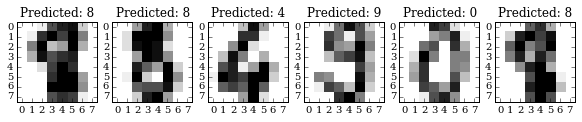

In [9]:
print "Classification report for classifier {0}:".format(classifier)
print metrics.classification_report(testing_labels, predicted_labels)

print "Confusion matrix:\n",metrics.confusion_matrix(testing_labels, predicted_labels)

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted_labels))

plt.figure(figsize=(10,4))
for index, (image, prediction) in enumerate(images_and_predictions[:6]):
    plt.subplot(2, 6, index+1)
    #plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predicted: %i' % prediction)

plt.show()

## Cool, but let's go further: I'll load some of my own handwriting!

<img src="handwrite-me.jpg">
<img src="handwrite-large.png" width="50%"> 

In [10]:
from scipy import misc, ndimage
im = misc.imread("handwrite-small.png")
im = (255-im)/16.0

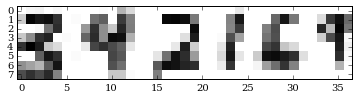

In [11]:
plt.set_cmap(plt.cm.gray_r)
plt.imshow(im, interpolation='nearest')


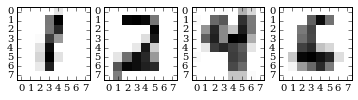

In [12]:
four = im[:,6:14]
two = im[:,14:14+8]
six = im[:,25:25+8]
one = im[:,20:20+8].copy()
one[:,6:] = 0 # the next letter was too close so have to overwrite that part

plt.subplot(1,4,1)
plt.imshow(one, interpolation='nearest')
plt.subplot(1,4,2)
plt.imshow(two, interpolation='nearest')
plt.subplot(1,4,3)
plt.imshow(four, interpolation='nearest')
plt.subplot(1,4,4)
plt.imshow(six, interpolation='nearest')



In [13]:
classifier.predict( [one.flatten(),two.flatten(),four.flatten(), six.flatten()] )

array([1, 2, 9, 4])

Not bad!  My handwriting isn't so great! (the 4 and the 6 get confused with 9 and 4)





# Another demo:
Visualizing what a SVM does!
(see console demo)
